In [ ]:
import json 
import networkx as nx
from networkx.algorithms import community

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def unpackJson():
    
    f = open("../../Resources/data.json",)
    graph_dict = json.load(f) 
    #print(graph_dict) 
    
    all_graphs = []
        
    for cur_graph in graph_dict['graphs']:

        each_graph = {"node": None, "edges": None, "simplices": None, "hyperedges": None}

        graph_edge_list = []    
        for cur_edge in cur_graph['edges']:
            temp_edge = []
            temp_edge.append(cur_edge['edge_start'])
            temp_edge.append(cur_edge['edge_end'])
            graph_edge_list.append((temp_edge))

        simplicial_edge_list = []    
        for cur_edge in cur_graph['simplicials']:
            temp_edge = cur_edge['nodes']        
            simplicial_edge_list.append((temp_edge))    

        hypergraph_edge_list = []    
        for cur_edge in cur_graph['hyperedges']:
            temp_edge = cur_edge['nodes']        
            hypergraph_edge_list.append((temp_edge))

        each_graph["node"] = cur_graph['nodes']
        each_graph["edges"] = graph_edge_list
        each_graph["simplices"] = simplicial_edge_list
        each_graph["hyperedges"] = hypergraph_edge_list

        all_graphs.append(each_graph)
        #print(each_graph)   
        
    return all_graphs

In [ ]:
def packJson(G):
    edges = []
    for cur_edge in G.edges():
        cur_edge = list(cur_edge)

        edges.append({"edge_start":cur_edge[0], "edge_end":cur_edge[-1], "weight":1})


    graph = {"edges":edges,"simplicials":[],"hyperedges":[],"nodes":list(G.nodes())}
    print(graph)

    with open("../../Resources/output.json", 'w') as json_file:
        json.dump(graph, json_file)

In [ ]:
def graph_addition(all_graphs):
    
    if (len(all_graphs) < 2):
        return None
    
    G = nx.Graph()
    G.add_nodes_from(all_graphs[0]["node"])
    G.add_edges_from(all_graphs[0]["edges"])
    
    for iter in range(1, len(all_graphs)):
    
        G_2 = nx.Graph()
        G_2.add_nodes_from(all_graphs[iter]["node"])
        G_2.add_edges_from(all_graphs[iter]["edges"])

        G_new = nx.compose(G,G_2)
        G = G_new
    
    #plt.subplot(121)
    #nx.draw(G_new, with_labels=True, font_weight='bold')
    return G

In [ ]:
def topological_sort(all_graphs):
        
    DG = nx.DiGraph(list(all_graphs[0]['edges']))
    nodes = list(nx.topological_sort(DG))
    print(nodes)
    
    graph = {"edges":[],"simplicials":[],"hyperedges":[],"nodes":nodes}
    print(graph)

    with open("../../Resources/output.json", 'w') as json_file:
        json.dump(graph, json_file)
    

In [ ]:
def find_shortest_path(all_graphs, source, target):    
        
    G = nx.Graph()
    G.add_nodes_from(all_graphs[0]["node"])
    G.add_edges_from(all_graphs[0]["edges"])
    
    try:
        nodes = nx.shortest_path(G, source = source, target = target)

        graph = {"edges":[],"simplicials":[],"hyperedges":[],"nodes":nodes}
        print(graph)
        
    except:
        graph = {"edges":[],"simplicials":[],"hyperedges":[],"nodes":[]}
        print(graph)

    with open("../../Resources/output.json", 'w') as json_file:
        json.dump(graph, json_file)

In [ ]:
def degree_centrality(all_graphs):
    G = nx.Graph()
    G.add_nodes_from(all_graphs[0]["node"])
    G.add_edges_from(all_graphs[0]["edges"])
    
    try:
        nodes = nx.degree_centrality(G)
        nodes_pair = sorted(nodes.items(), key=lambda x: x[1], reverse=True)
        
        nodes = []
        for item in nodes_pair:
            nodes.append(item[0])

        graph = {"edges":[],"simplicials":[],"hyperedges":[],"nodes":nodes}
        print(graph)
        
    except:
        graph = {"edges":[],"simplicials":[],"hyperedges":[],"nodes":[]}
        print(graph)

    with open("../../Resources/output.json", 'w') as json_file:
        json.dump(graph, json_file)
        

In [ ]:
def community_detection(all_graphs):
    
    G = nx.Graph()
    G.add_nodes_from(all_graphs[0]["node"])
    G.add_edges_from(all_graphs[0]["edges"])
    
    try:
        communities_generator = community.girvan_newman(G)
        top_level_communities = next(communities_generator)
        next_level_communities = next(communities_generator)
        all_communities = sorted(map(sorted, next_level_communities))

        graphs = []
        for each_com in all_communities:
            graphs.append({"edges":[],"simplicials":[],"hyperedges":[],"nodes":each_com})
            
    except:
        graphs = []
        graphs.append({"edges":[],"simplicials":[],"hyperedges":[],"nodes":all_graphs[0]["node"]})
    
    final_json = {"graphs":graphs}
    print(final_json)
    with open("../../Resources/output.json", 'w') as json_file:
        json.dump(final_json, json_file)

In [65]:
def Graph_getLayout(all_graphs, layout_type):
    
    G = nx.Graph()
    G.add_nodes_from(all_graphs[0]["node"])
    G.add_edges_from(all_graphs[0]["edges"])
    
    pos = []
    node_cord = []       
    
    try:
        if (layout_type == "circular"):
            pos=nx.circular_layout(G)
        
        elif (layout_type == "random"):
            pos=nx.random_layout(G)
        
        elif (layout_type == "spring"):
            pos=nx.spring_layout(G)
        
        elif (layout_type == "spectral"):
            pos=nx.spectral_layout(G)
        
        else:
            pos=nx.fruchterman_reingold_layout(G)            
            
        for each_pos in pos.keys():
            pixel_cord = pos[each_pos]
            #node_cord.append({"node_id": each_pos, "x": str(round(pixel_cord[0],3)), "y": str(round(pixel_cord[1],3))})
            node_cord.append({"node_id": each_pos, "x": str(pixel_cord[0]), "y": str(pixel_cord[1])})
        
    except:         
        node_cord.append({"node_id": -1, "x": str(-1), "y": str(-1)})
        
    final_json = {"node_cord": node_cord}
    print(final_json)
    with open("../../Resources/output.json", 'w') as json_file:
        json.dump(final_json, json_file)
    
    return G, pos

{'node_cord': [{'node_id': 10, 'x': '1.0', 'y': '4.371138828673793e-08'}, {'node_id': 11, 'x': '-1.0', 'y': '-4.371138828673793e-08'}]}


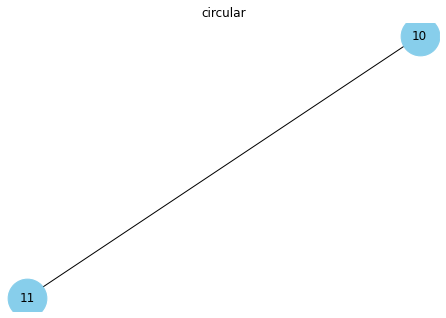

In [66]:
all_graphs = unpackJson()
G, pos = Graph_getLayout(all_graphs, "circular")
# packJson(G)

nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=pos)
plt.title("circular")

plt.show()

In [ ]:
G = graph_addition(unpackJson())
packJson(G)

In [ ]:
all_graphs = unpackJson()
print(all_graphs)
args = "shortestpath_1_3".split("_")
source, target =  args[1], args[-1]
find_shortest_path(all_graphs, int(source), int(target))
# G = find_shortest_path(unpackJson(), 1, 3)

In [ ]:
all_graphs = unpackJson()
degree_centrality(all_graphs)
# G = find_shortest_path(unpackJson(), 1, 3)

In [ ]:
all_graphs = unpackJson()
community_detection(all_graphs)